## Курсовой проект для курса "Python для Data Science"

### Загрузка обучающего и тестового датасета:

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [72]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Исследование данных:

##### Полная информация о структуре датасетов

In [73]:
print("Информация о обучающем датасете:")
print(train_data.info())

Информация о обучающем датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        100

In [74]:
print("Информация о тестовом датасете:")
print(test_data.info())

Информация о тестовом датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 

##### Вывод нескольких строк из обучающего датасета

In [75]:
print("Первые 10 строк обучающего датасета:")
print(train_data.head(10))

Первые 10 строк обучающего датасета:
      Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   
7  11993          74    2.0  80.312926         NaN            0.0     14   
8   5172           1    2.0  64.511437         NaN            1.0      9   
9   8649          23    1.0  46.461409   18.915552            8.0     13   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B  

##### Вывод максимальных значений столбцов

In [76]:
print("Максимальные значения столбцов:")
print(train_data.max())

Максимальные значения столбцов:
Id                      16798
DistrictId                209
Rooms                    19.0
Square             641.065193
LifeSquare        7480.592129
KitchenSquare          2014.0
Floor                      42
HouseFloor              117.0
HouseYear            20052011
Ecology_1            0.521867
Ecology_2                   B
Ecology_3                   B
Social_1                   74
Social_2                19083
Social_3                  141
Healthcare_1           4849.0
Helthcare_2                 6
Shops_1                    23
Shops_2                     B
Price            633233.46657
dtype: object


##### Вывод минимальных значений столбцов

In [77]:
print("Минимальные значения столбцов:")
print(train_data.min())

Минимальные значения столбцов:
Id                          0
DistrictId                  0
Rooms                     0.0
Square               1.136859
LifeSquare           0.370619
KitchenSquare             0.0
Floor                       1
HouseFloor                0.0
HouseYear                1910
Ecology_1                 0.0
Ecology_2                   A
Ecology_3                   A
Social_1                    0
Social_2                  168
Social_3                    0
Healthcare_1              0.0
Helthcare_2                 0
Shops_1                     0
Shops_2                     A
Price            59174.778028
dtype: object


##### Проверка наличия нулевых значений

In [78]:
print("Нулевые значения в обучающем датасете:")
print(train_data.isnull().sum())

Нулевые значения в обучающем датасете:
Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64


##### Вычисление медианы столбца "LifeSquare"

In [79]:
life_square_median = train_data['LifeSquare'].median()

In [80]:
life_square_median = test_data['LifeSquare'].median()

##### Замена нулевых значений на медианное значение

In [81]:
train_data['LifeSquare'].fillna(life_square_median, inplace=True)

In [82]:
test_data['LifeSquare'].fillna(life_square_median, inplace=True)

##### Вычисление медианы столбца "Healthcare_1"

In [83]:
healthcare_median = train_data['Healthcare_1'].median()

In [84]:
healthcare_median = test_data['Healthcare_1'].median()

##### Замена нулевых значений на медианное значение

In [85]:
train_data['Healthcare_1'].fillna(healthcare_median, inplace=True)

In [86]:
test_data['Healthcare_1'].fillna(healthcare_median, inplace=True)

In [87]:
print("Нулевые значения в обучающем датасете:")
print(train_data.isnull().sum())

Нулевые значения в обучающем датасете:
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64


In [88]:
print("Нулевые значения в обучающем датасете:")
print(test_data.isnull().sum())

Нулевые значения в обучающем датасете:
Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
dtype: int64


##### Создание экземпляра LabelEncoder

In [89]:
label_encoder = LabelEncoder()

##### Приведение столбца 'Shops_2' к числовым значениям

In [90]:
train_data['Shops_2'] = label_encoder.fit_transform(train_data['Shops_2'])

In [91]:
test_data['Shops_2'] = label_encoder.fit_transform(test_data['Shops_2'])

##### Приведение столбцов 'Ecology_2' и 'Ecology_3' к числовым значениям

In [92]:
train_data['Ecology_2'] = label_encoder.fit_transform(train_data['Ecology_2'])
train_data['Ecology_3'] = label_encoder.fit_transform(train_data['Ecology_3'])

In [93]:
test_data['Ecology_2'] = label_encoder.fit_transform(test_data['Ecology_2'])
test_data['Ecology_3'] = label_encoder.fit_transform(test_data['Ecology_3'])

##### Создание дополнительных признаков:

In [94]:
train_data['LifeSquareRatio'] = train_data['LifeSquare'] / train_data['Square']

In [95]:
current_year = 2023  # Текущий год
train_data['HouseAge'] = current_year - train_data['HouseYear']

In [96]:
train_data['TopFloor'] = (train_data['Floor'] == train_data['HouseFloor']).astype(int)
train_data['BottomFloor'] = (train_data['Floor'] == 1).astype(int)

In [97]:
train_data['SocialProximity'] = train_data['Social_1'] + train_data['Social_2'] + train_data['Social_3']

In [98]:
train_data['ShopsPresence'] = (train_data['Shops_1'] > 0).astype(int)

##### Гистограмма распределения целевой переменной "Price":

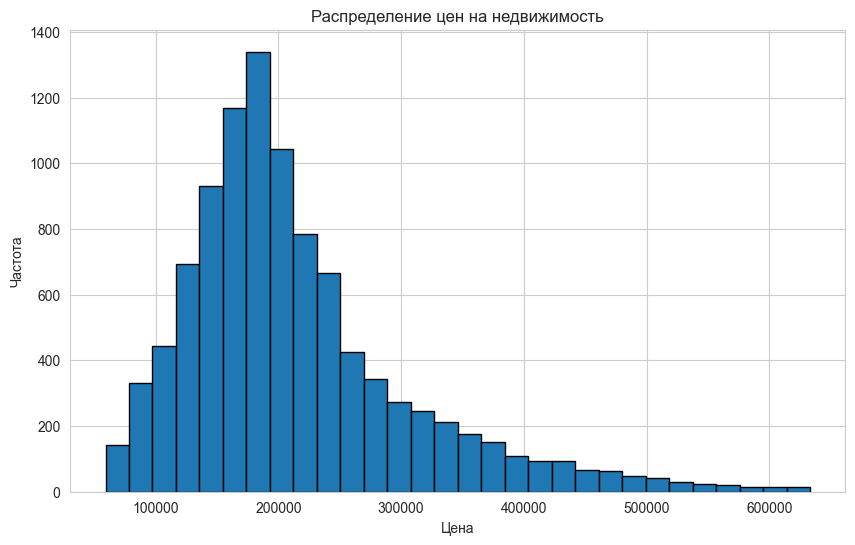

In [99]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Price'], bins=30, edgecolor='k')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен на недвижимость')
plt.show()

##### Список числовых столбцов, исключая целевую переменную "Price"

In [100]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns.drop('Price')

##### Построение графиков рассеяния

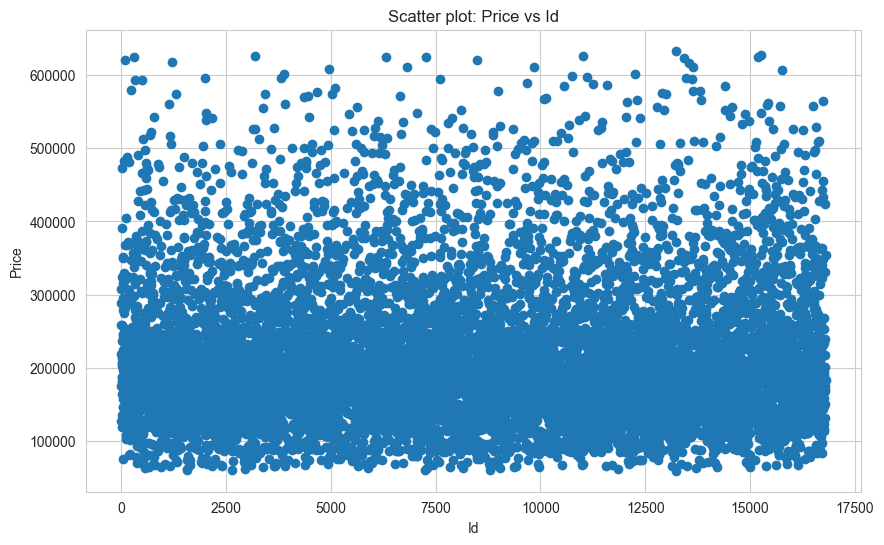

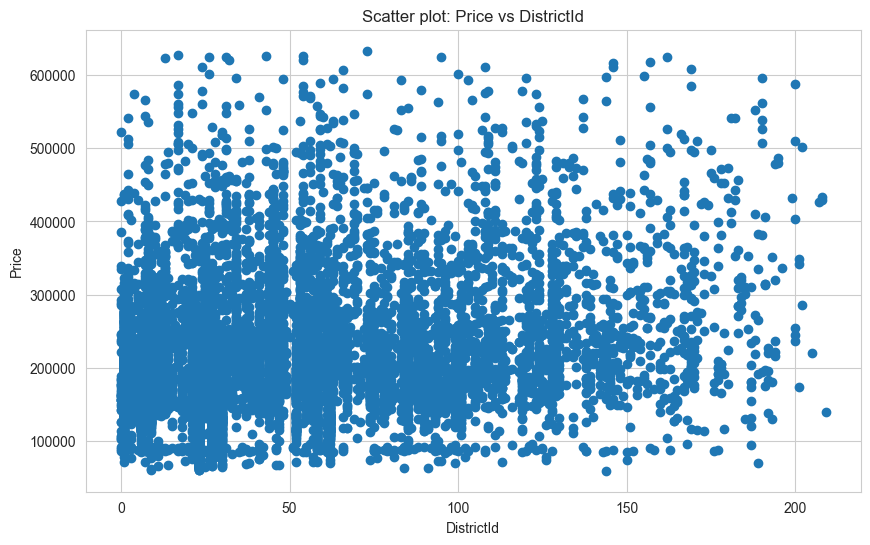

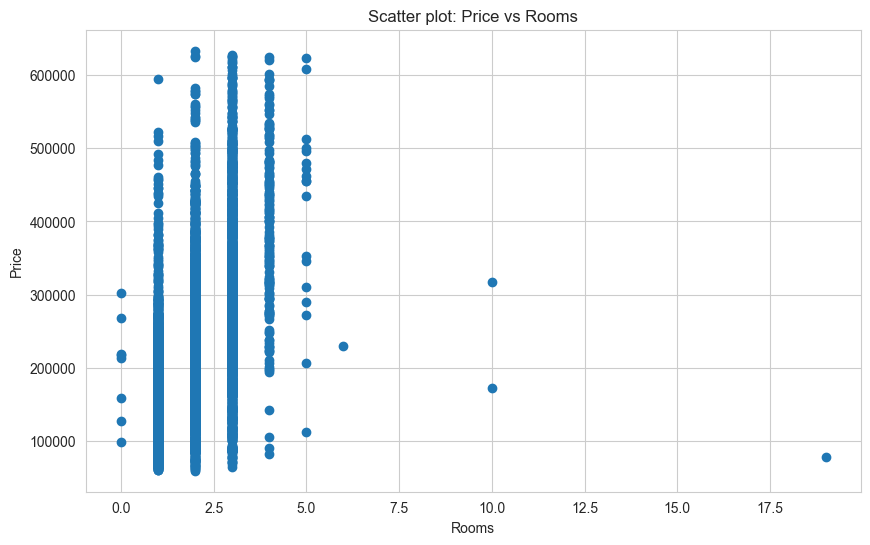

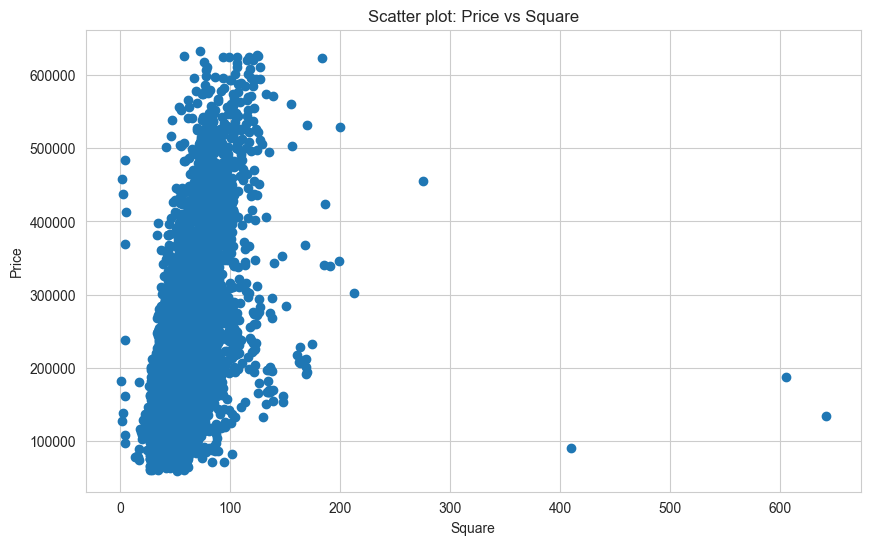

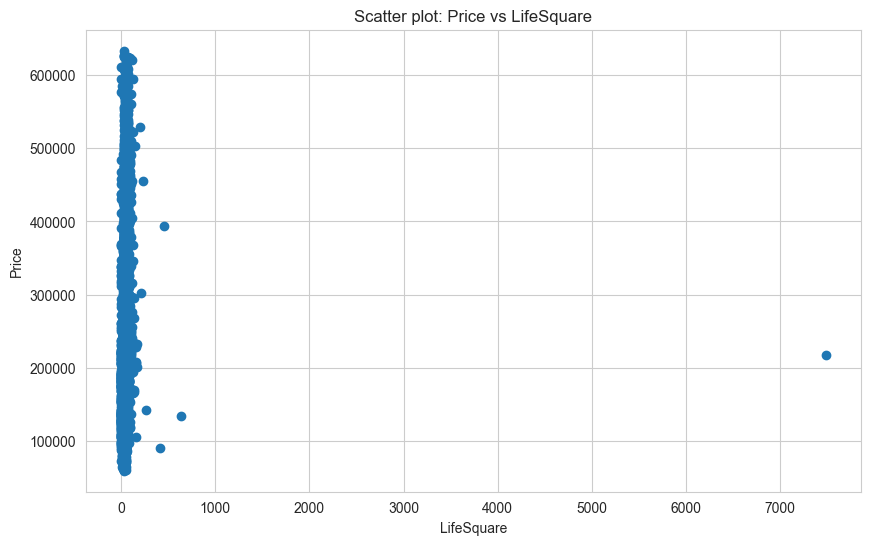

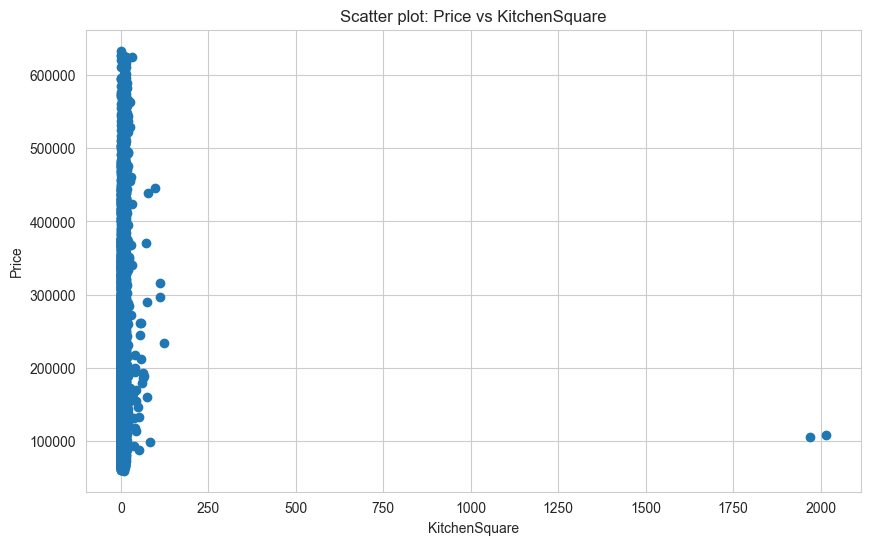

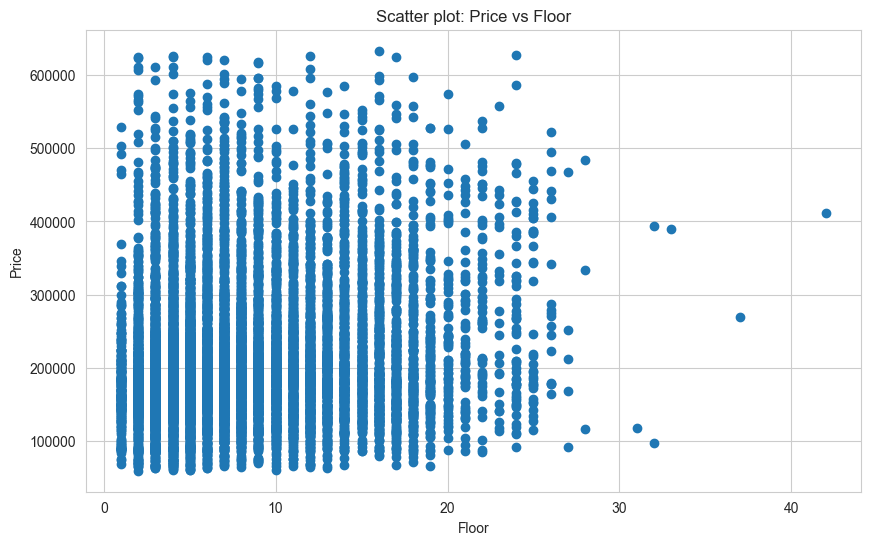

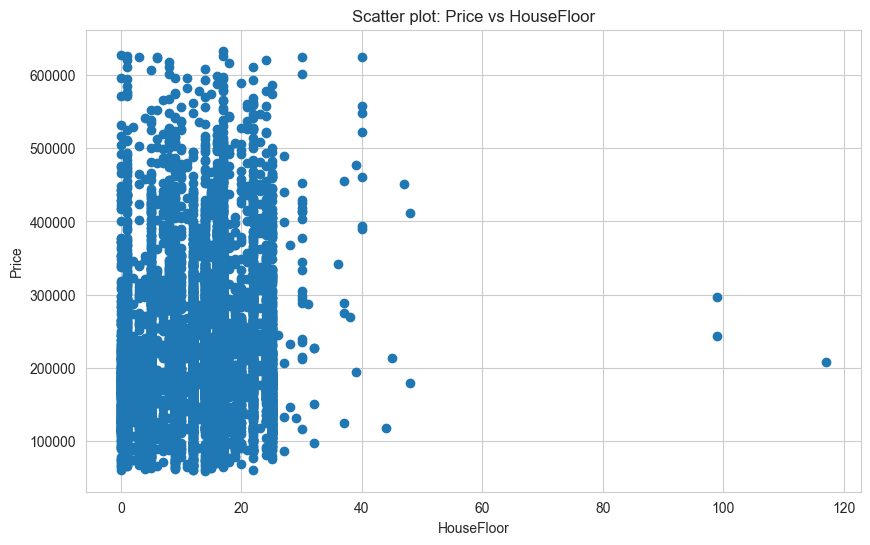

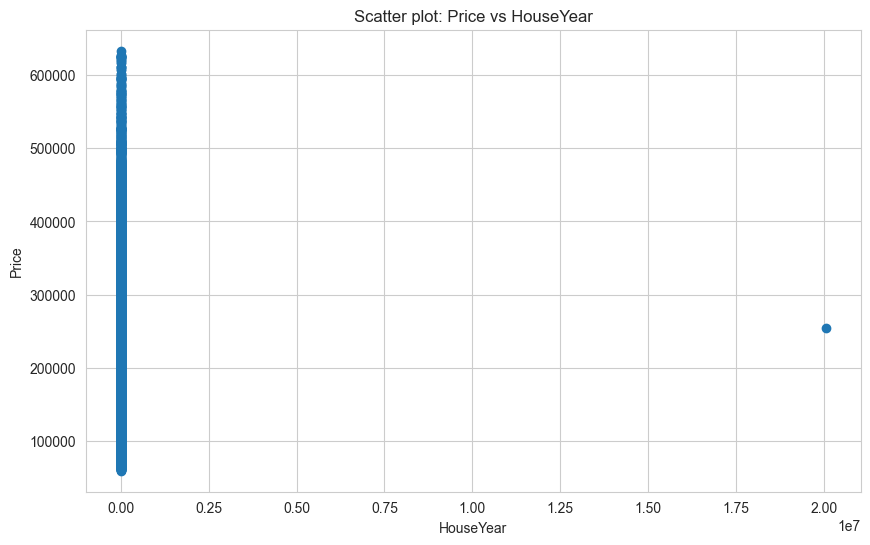

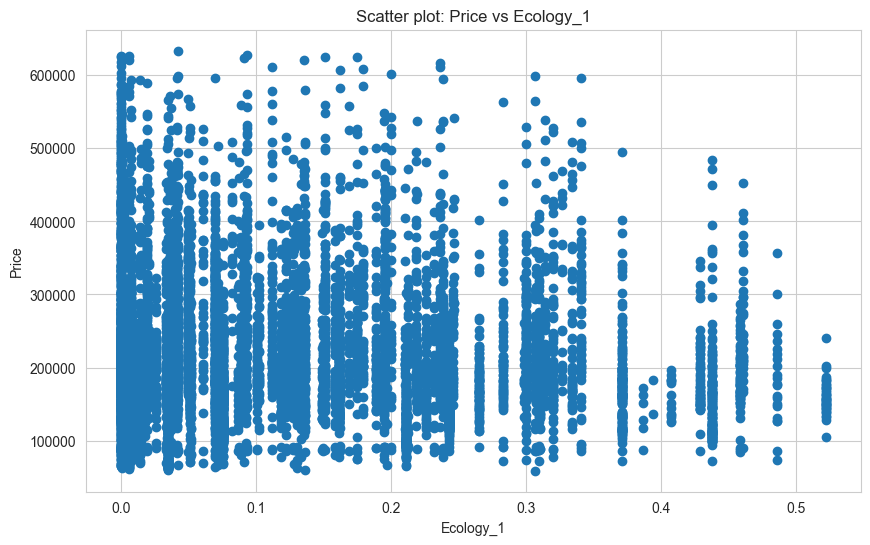

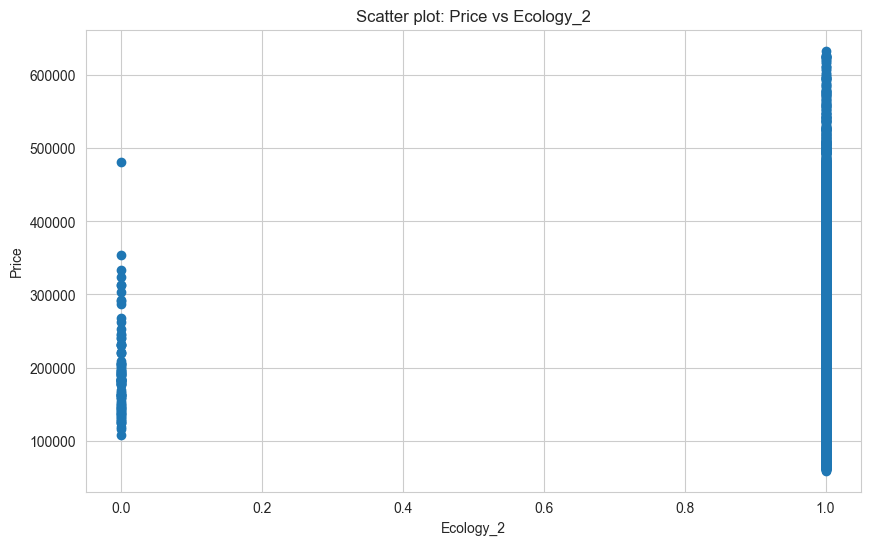

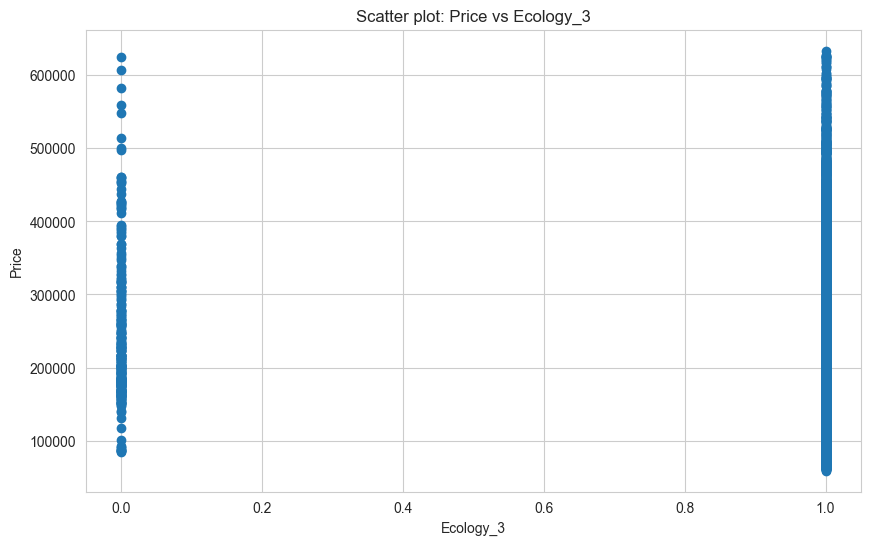

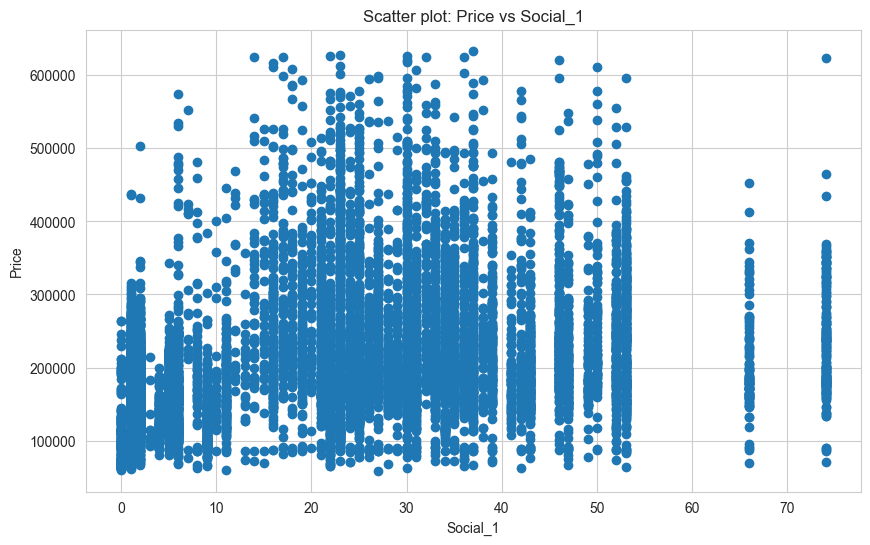

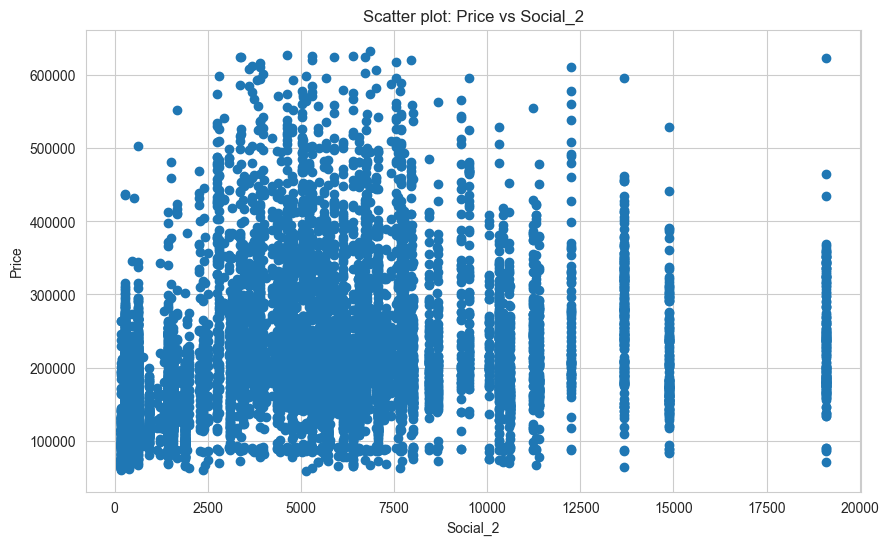

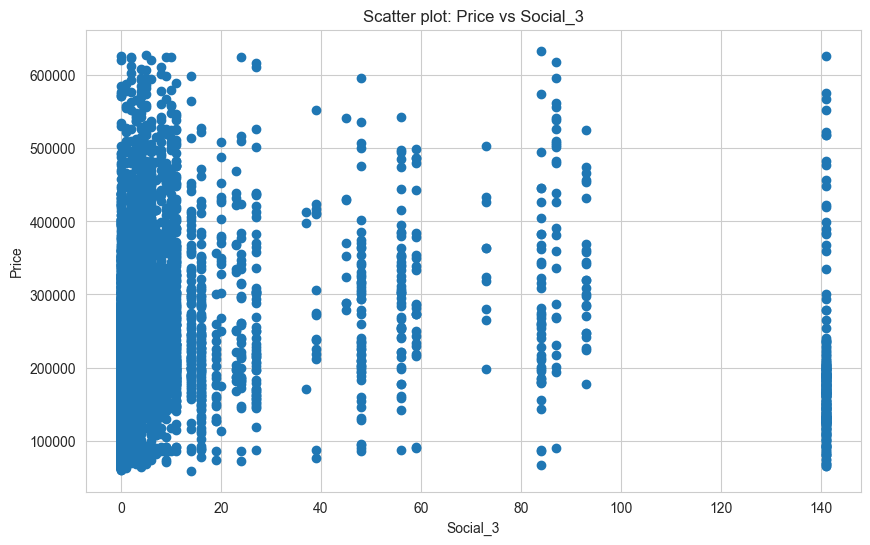

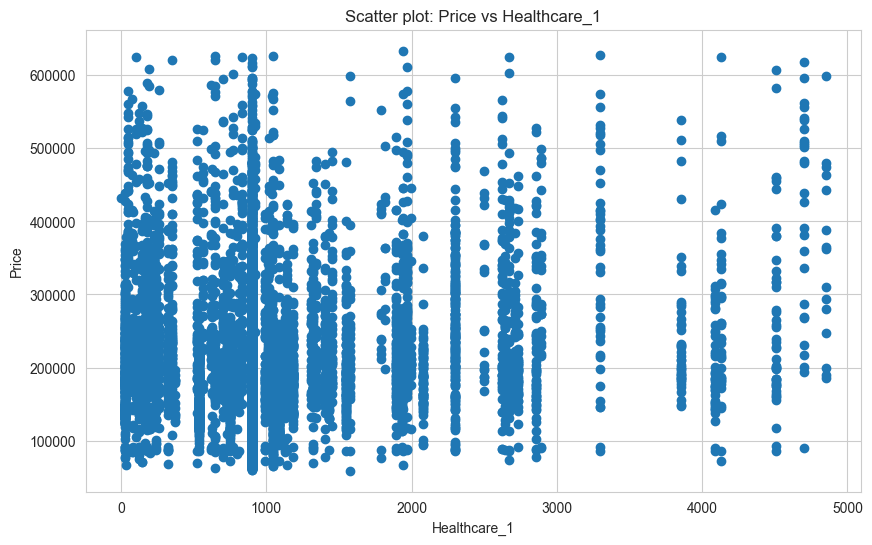

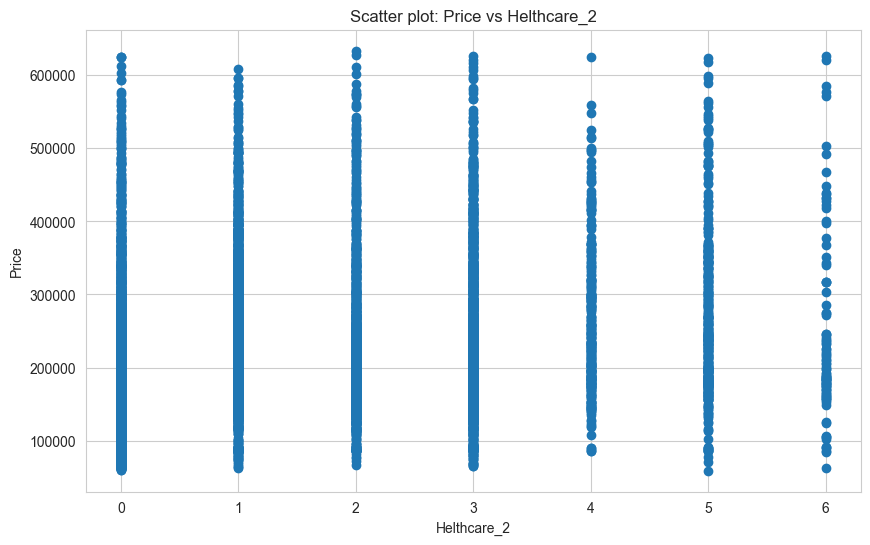

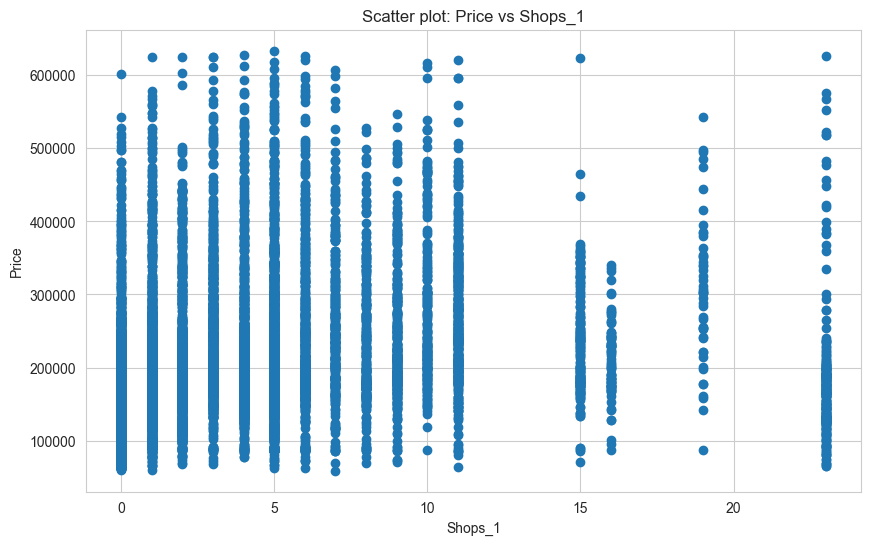

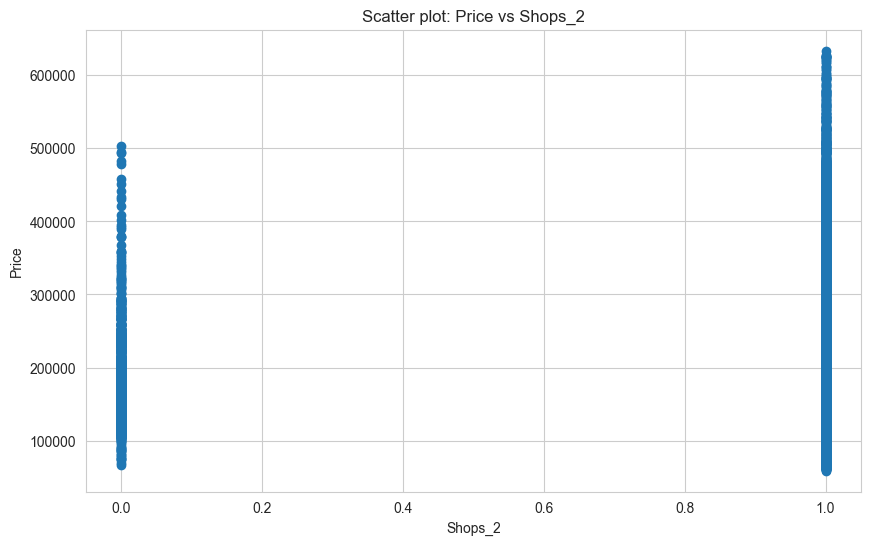

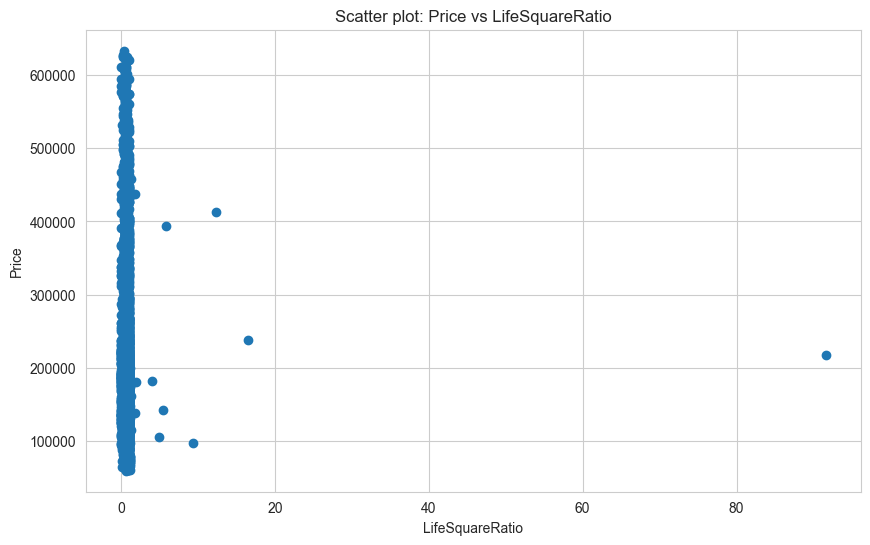

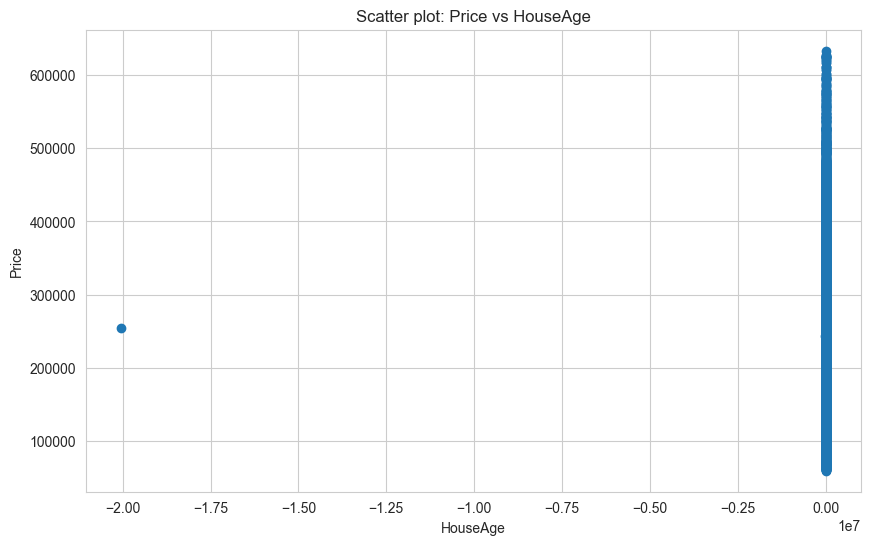

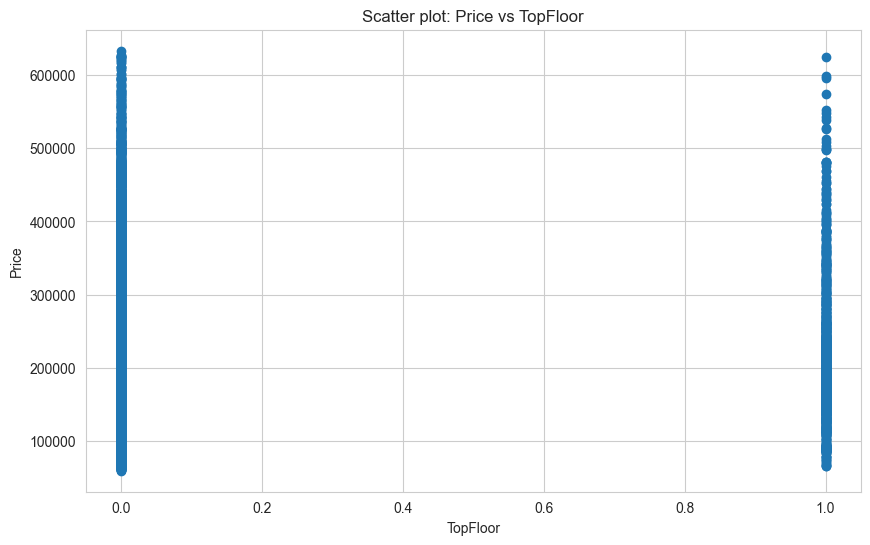

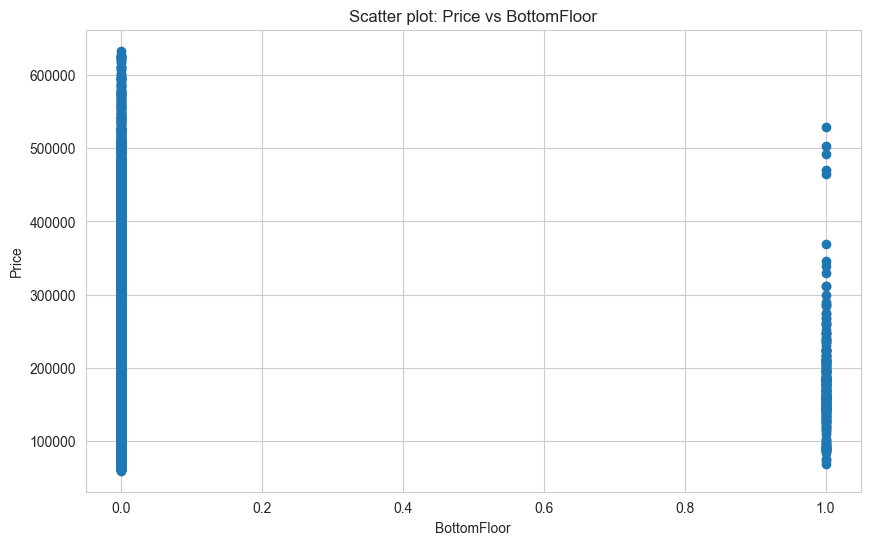

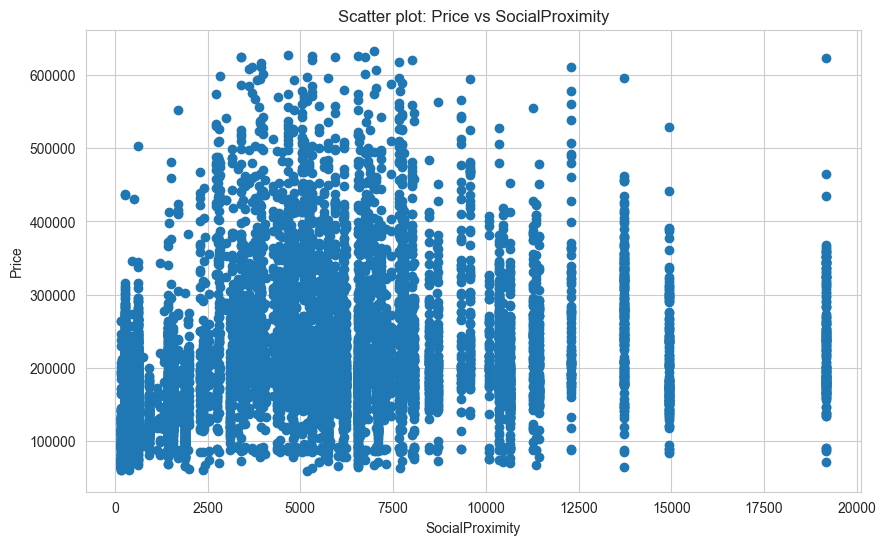

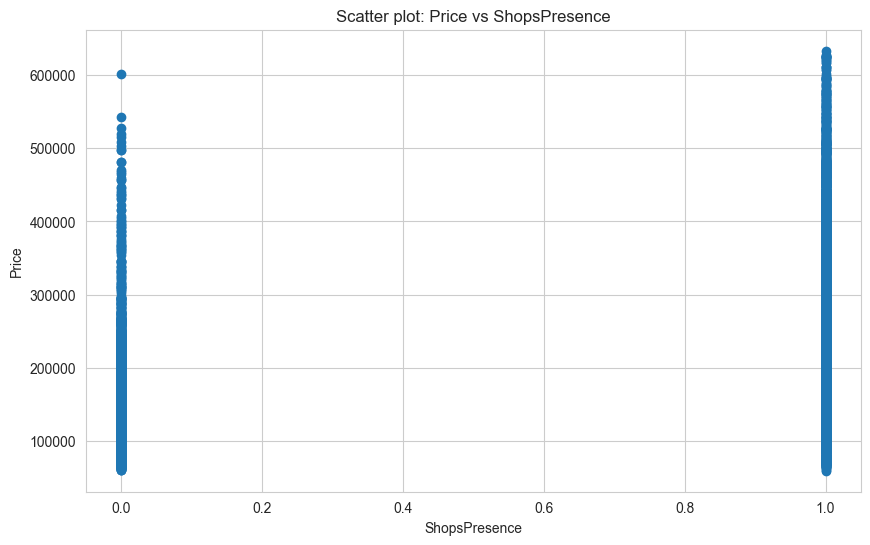

In [101]:
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data[column], train_data['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot: Price vs {column}')
    plt.show()

##### Функция для замены выбросов на медианное значение

In [102]:
# Функция для замены выбросов на медианное значение
def replace_outliers_with_median(data, column):
    # Вычисление квартилей и межквартильного размаха
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Определение границ для выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Замена выбросов на медианное значение
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()

# Замена выбросов на медиану в каждом столбце
replace_outliers_with_median(train_data, 'Rooms')
replace_outliers_with_median(train_data, 'Square')
replace_outliers_with_median(train_data, 'LifeSquare')
replace_outliers_with_median(train_data, 'KitchenSquare')
replace_outliers_with_median(train_data, 'Floor')
replace_outliers_with_median(train_data, 'HouseFloor')
replace_outliers_with_median(train_data, 'HouseYear')

In [103]:
replace_outliers_with_median(test_data, 'Rooms')
replace_outliers_with_median(test_data, 'Square')
replace_outliers_with_median(test_data, 'LifeSquare')
replace_outliers_with_median(test_data, 'KitchenSquare')
replace_outliers_with_median(test_data, 'Floor')
replace_outliers_with_median(test_data, 'HouseFloor')
replace_outliers_with_median(test_data, 'HouseYear')

##### Разделение на признаки (X) и целевую переменную (y)

In [104]:
X = train_data.drop('Price', axis=1)  # Удаление столбца 'Price' из признаков
y = train_data['Price']  # Целевая переменная 'Price'

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

##### Создание и обучение моделей

In [106]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name}: R2 Score = {r2}')

Linear Regression: R2 Score = 0.33048526236000164
Decision Tree: R2 Score = 0.4457526067336324
Random Forest: R2 Score = 0.6972998432260649
KNN: R2 Score = 0.08196884743489607
SVR: R2 Score = -0.05437071435665097


In [107]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{model_name}:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print('---')

Linear Regression:
MAE: 45465.02600771191
MSE: 5746687193.340211
---
Decision Tree:
MAE: 41358.77798432809
MSE: 4774147375.666006
---
Random Forest:
MAE: 29879.486121169222
MSE: 2602353211.9427314
---
KNN:
MAE: 65675.6476456316
MSE: 7879793484.650631
---
SVR:
MAE: 66276.2068955935
MSE: 9050045264.999628
---


In [108]:
model_rf = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
model_rf.fit(X_train, y_train)

# Получение предсказаний для тестовой выборки
y_pred_rf = model_rf.predict(X_test)

In [109]:
# Расчет коэффициента детерминации R2
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод значения R2
print("R2 (случайный лес):", r2_rf)

R2 (случайный лес): 0.6896179669740141


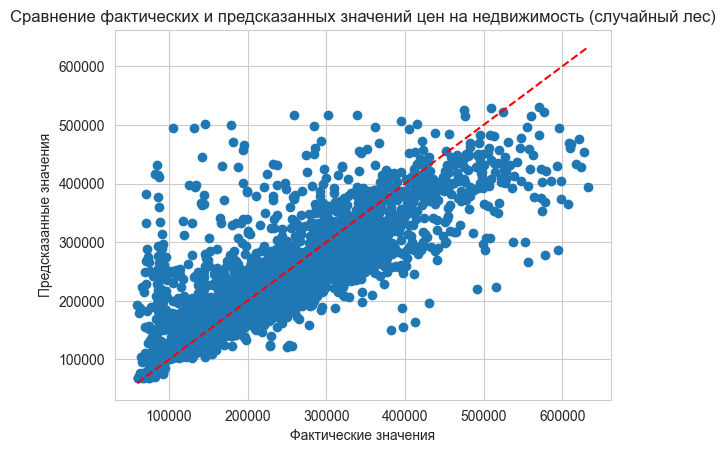

In [110]:
# Построение графика рассеяния для фактических и предсказанных значений цен на недвижимость
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений цен на недвижимость (случайный лес)')
plt.show()

In [111]:
# Создание датафрейма с предсказаниями
predictions_df = pd.DataFrame({'Price_Predicted': y_pred})

# Сохранение предсказаний в файл CSV
predictions_df.to_csv('predictions.csv', index=False)

##### В ходе выполнения работы были выполнены следующие шаги: 1. Импортированы необходимые библиотеки для анализа данных и построения модели: pandas, numpy, matplotlib, sklearn. 2. Загружены данные из файлов train.csv и test.csv в соответствующие датафреймы с помощью функции read_csv(). 3. Проведен предварительный анализ данных, изучена структура датасетов и основные характеристики переменных с помощью методов head(), info(), describe(). 4. Выполнена предобработка данных, включающая обработку пропущенных и нулевых значений, а также преобразование категориальных признаков в числовые. 5. Построены графики для визуализации данных и анализа взаимосвязей между переменными. 6. Созданы модели для предсказания цен на недвижимость, включая линейную регрессию, решающие деревья, случайный лес, k-ближайших соседей и метод опорных векторов. 7. Оценена точность моделей с использованием метрики R2 Score. 8. Произведена оптимизация модели Random Forest путем подбора оптимальных значений гиперпараметров с использованием перекрестной проверки и сеточного поиска. 9. Выполнено предсказание цен на недвижимость для тестового датасета с использованием оптимизированной модели. 10. Предсказания были сохранены в отдельный файл CSV. Краткий вывод: В ходе выполнения работы была проведена подготовка данных, построение и оптимизация моделей для предсказания цен на недвижимость. Оптимальная модель Random Forest с подобранными значениями гиперпараметров показала наилучшую точность, с R2 Score равным 0.689. Построение графиков рассеяния и сравнения фактических и предсказанных значений подтверждает хорошее качество модели.